In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
columns = ['datetime','choke','psig','apsig','oil','gas','water']
columns2 = ['choke','psig','apsig','oil','gas','water']

In [3]:
df_raw = pd.read_csv('final.csv')

# use 100 data only
# df_raw = df_raw.head(100)

df_raw = df_raw.set_index('datetime')

In [4]:
df_raw

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,38,935,320,698.880,4.980,23.616
15/5/2021 21:15:00,38,935,321,822.456,4.988,32.592
15/5/2021 21:30:00,38,940,318,661.368,5.070,26.208
15/5/2021 21:45:00,38,938,317,737.664,5.061,29.232
15/5/2021 22:00:00,38,940,319,661.368,5.078,26.208
...,...,...,...,...,...,...
4/6/2021 08:00:00,42,986,328,771.720,7.638,16.896
4/6/2021 08:15:00,42,984,325,766.032,7.602,16.704
4/6/2021 08:30:00,42,986,328,765.216,7.638,16.704


# normalization min max

In [5]:
def minmax_normalize(df):
    return (df - df.min()) / (df.max() - df.min())
    

In [6]:
df_normalized = df_raw.copy()
df_normalized[columns2] = minmax_normalize(df_normalized[columns2])

df_normalized

,choke,psig,apsig,oil,gas,water
datetime,,,,,,
15/5/2021 21:00:00,0.0,0.431034,0.444444,0.311858,0.080260,0.417431
15/5/2021 21:15:00,0.0,0.431034,0.472222,0.748918,0.082992,0.631881
15/5/2021 21:30:00,0.0,0.452586,0.388889,0.179187,0.110997,0.479358
15/5/2021 21:45:00,0.0,0.443966,0.361111,0.449028,0.107923,0.551606
15/5/2021 22:00:00,0.0,0.452586,0.416667,0.179187,0.113730,0.479358
...,...,...,...,...,...,...
4/6/2021 08:00:00,1.0,0.650862,0.666667,0.569476,0.988046,0.256881
4/6/2021 08:15:00,1.0,0.642241,0.583333,0.549359,0.975751,0.252294
4/6/2021 08:30:00,1.0,0.650862,0.666667,0.546473,0.988046,0.252294


In [7]:
df_normalized.describe()

,choke,psig,apsig,oil,gas,water
count,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000,1878.000000
mean,0.373536,0.746895,0.666164,0.568969,0.655763,0.256388
std,0.384998,0.220544,0.183364,0.136035,0.256358,0.125876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.659483,0.583333,0.466429,0.532275,0.233945
50%,0.500000,0.803879,0.666667,0.572023,0.764686,0.256881
75%,0.500000,0.922414,0.777778,0.670911,0.805328,0.275229
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
def plot_rows(df, columns):
    fig, ax = plt.subplots(len(columns), 1, figsize=(10, 10))
    for i, column in enumerate(columns):
        ax[i].plot(df.index, df[column])
        # reduce x label
        ax[i].set_xticks(ax[i].get_xticks()[::30])
        ax[i].set_title(column)
    plt.show()

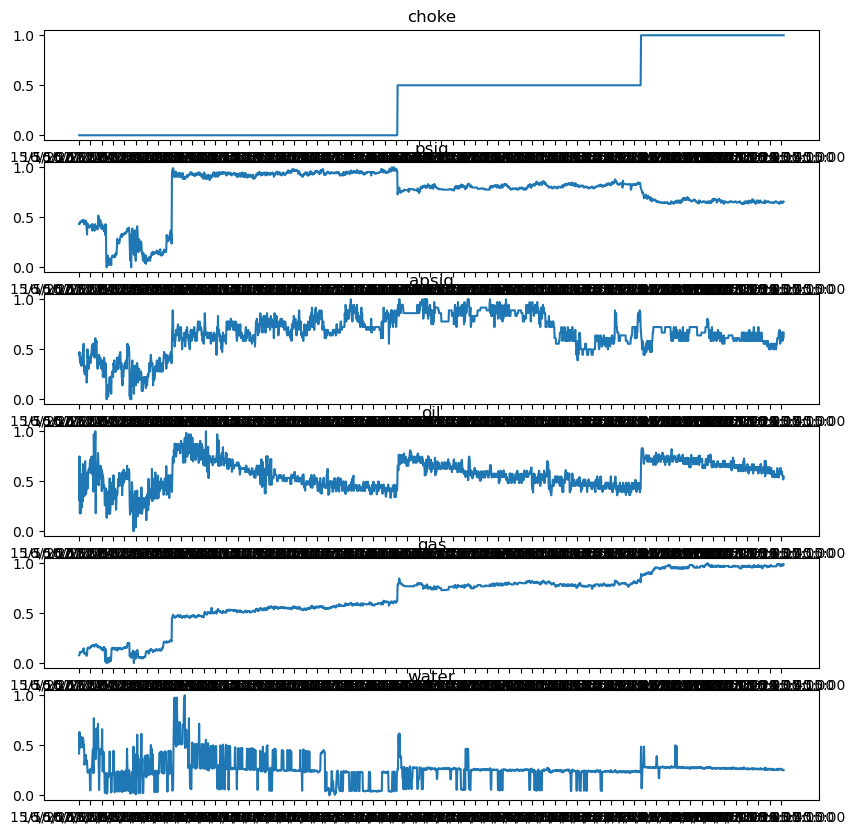

In [9]:
plot_rows(df_normalized, columns2)

# Reference
- https://medium.com/analytics-vidhya/lstms-explained-a-complete-technically-accurate-conceptual-guide-with-keras-2a650327e8f2
- https://bobrupakroy.medium.com/multivariate-multistep-lstm-38d9536a6b2e

![lstm_model](lstm_model.png)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
t = df_raw.columns.tolist()
dataset = df_raw.values

In [12]:
# convert to pandas dataframe
df = pd.DataFrame(dataset, columns=columns2)
df.head()

,choke,psig,apsig,oil,gas,water
0,38.0,935.0,320.0,698.880,4.980,23.616
1,38.0,935.0,321.0,822.456,4.988,32.592
2,38.0,940.0,318.0,661.368,5.070,26.208
3,38.0,938.0,317.0,737.664,5.061,29.232
4,38.0,940.0,319.0,661.368,5.078,26.208


In [13]:
# data pre-processing
x_1 = df['choke'].values
x_2 = df['psig'].values
x_3 = df['apsig'].values
y_1 = df['oil'].values
y_2 = df['gas'].values
y_3 = df['water'].values

In [14]:
print('x_1 shape:', x_1.shape)
print('x_2 shape:', x_2.shape)
print('x_3 shape:', x_3.shape)
print('y_1 shape:', y_1.shape)
print('y_2 shape:', y_2.shape)
print('y_3 shape:', y_3.shape)
print('x_1 data:', x_1)

x_1 shape: (1878,)
x_2 shape: (1878,)
x_3 shape: (1878,)
y_1 shape: (1878,)
y_2 shape: (1878,)
y_3 shape: (1878,)
x_1 data: [38. 38. 38. ... 42. 42. 42.]


In [15]:
# reshape
x_1 = x_1.reshape(len(x_1), 1)
x_2 = x_2.reshape(len(x_2), 1)
x_3 = x_3.reshape(len(x_3), 1)
y_1 = y_1.reshape(len(y_1), 1)
y_2 = y_2.reshape(len(y_2), 1)
y_3 = y_3.reshape(len(y_3), 1)

print('x_1 shape:', x_1.shape)
print('x_2 shape:', x_2.shape)
print('x_3 shape:', x_3.shape)
print('y_1 shape:', y_1.shape)
print('y_2 shape:', y_2.shape)
print('y_3 shape:', y_3.shape)

print('x_1 data:', x_1)

x_1 shape: (1878, 1)
x_2 shape: (1878, 1)
x_3 shape: (1878, 1)
y_1 shape: (1878, 1)
y_2 shape: (1878, 1)
y_3 shape: (1878, 1)
x_1 data: [[38.]
 [38.]
 [38.]
 ...
 [42.]
 [42.]
 [42.]]


In [16]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

In [17]:
# scaling
scaler = MinMaxScaler(feature_range=(0, 1))
x_1_scaled = scaler.fit_transform(x_1)
x_2_scaled = scaler.fit_transform(x_2)
x_3_scaled = scaler.fit_transform(x_3)
y_1_scaled = scaler.fit_transform(y_1)
y_2_scaled = scaler.fit_transform(y_2)
y_3_scaled = scaler.fit_transform(y_3)

print('x_2_scaled:', x_2_scaled[:5])

x_2_scaled: [[0.43103448]
 [0.43103448]
 [0.45258621]
 [0.44396552]
 [0.45258621]]


In [18]:
# horizontally stack columns
# dataset_scaled = np.hstack((x_1_scaled, x_2_scaled, x_3_scaled, y_1_scaled, y_2_scaled, y_3_scaled))
dataset_scaled = np.hstack((x_1_scaled, x_2_scaled, x_3_scaled, y_1_scaled))
print("dataset_scaled.shape:", dataset_scaled.shape)
print("dataset_scaled:", dataset_scaled[:5])

dataset_scaled.shape: (1878, 4)
dataset_scaled: [[0.         0.43103448 0.44444444 0.31185808]
 [0.         0.43103448 0.47222222 0.74891775]
 [0.         0.45258621 0.38888889 0.17918683]
 [0.         0.44396552 0.36111111 0.4490281 ]
 [0.         0.45258621 0.41666667 0.17918683]]


In [19]:
#1. n_steps_in  : Specify how much data we want to look back for prediction
#2. n_steps_out : Specify how much multi-step data we want to forecast

def split_sequences(sequences, n_steps_in, n_steps_out):
  X, y = list(), list()
  for i in range(len(sequences)):
    # find the end of this pattern
    end_ix = i + n_steps_in
    out_end_ix = end_ix + n_steps_out-1
    # check if we are beyond the dataset
    if out_end_ix > len(sequences):
      break
    # gather input and output parts of the pattern
    seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1:out_end_ix, -1]
    X.append(seq_x)
    y.append(seq_y)
  return np.array(X), np.array(y)

In [20]:
n_steps_in, n_steps_out = 15, 2

In [21]:
X, y = split_sequences(dataset_scaled, n_steps_in, n_steps_out)
print('X shape:', X.shape)
print('y shape:', y.shape)
print('X:', X[0])
print('y:', y[0])

X shape: (1863, 15, 3)
y shape: (1863, 2)
X: [[0.         0.43103448 0.44444444]
 [0.         0.43103448 0.47222222]
 [0.         0.45258621 0.38888889]
 [0.         0.44396552 0.36111111]
 [0.         0.45258621 0.41666667]
 [0.         0.4612069  0.41666667]
 [0.         0.45258621 0.33333333]
 [0.         0.4612069  0.38888889]
 [0.         0.45258621 0.38888889]
 [0.         0.47413793 0.44444444]
 [0.         0.4612069  0.47222222]
 [0.         0.46982759 0.5       ]
 [0.         0.47413793 0.55555556]
 [0.         0.43103448 0.27777778]
 [0.         0.45258621 0.30555556]]
y: [0.35166794 0.47882183]


In [22]:
# splitting dataset into training set and test set
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.8, random_state=0)
# split_point = math.ceil(X.shape[0] * 0.8)
# train_X, test_X, train_y, test_y = X[:split_point,:], X[split_point:,:], y[:split_point, :], y[split_point:, :]

print('train_X shape:', train_X.shape)
print('train_y shape:', train_y.shape)
print('test_X shape:', test_X.shape)
print('test_y shape:', test_y.shape)

train_X shape: (1490, 15, 3)
train_y shape: (1490, 2)
test_X shape: (373, 15, 3)
test_y shape: (373, 2)


In [23]:
n_features = 3

In [24]:
import keras

2024-05-04 11:36:18.443742: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [25]:
# optimizing learning rate

opt = keras.optimizers.Adam(learning_rate=0.0001)

In [26]:
# import Activation
from keras.layers import Activation

In [27]:
# define model
model = keras.models.Sequential()
model.add(keras.layers.LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps_in, n_features)))
model.add(keras.layers.LSTM(50, activation='relu'))
model.add(keras.layers.Dense(n_steps_out))
model.add(Activation('linear'))
model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])

model.summary()

2024-05-04 11:36:20.145410: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 15, 50)            10800     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
 activation (Activation)     (None, 2)                 0         
                                                                 
Total params: 31,102
Trainable params: 31,102
Non-trainable params: 0
_________________________________________________________________


In [28]:
# fit network
history = model.fit(train_X , train_y , epochs=100, steps_per_epoch=15 , verbose=1 ,validation_data=(test_X, test_y) ,shuffle=False)

Epoch 1/100
15/15 [==============================] - 4s 131ms/step - loss: 0.3615 - accuracy: 0.4477 - val_loss: 0.3449 - val_accuracy: 0.5335
Epoch 2/100
15/15 [==============================] - 2s 100ms/step - loss: 0.3281 - accuracy: 0.4638 - val_loss: 0.3115 - val_accuracy: 0.5255
Epoch 3/100
15/15 [==============================] - 1s 97ms/step - loss: 0.2939 - accuracy: 0.4859 - val_loss: 0.2764 - val_accuracy: 0.5147
Epoch 4/100
15/15 [==============================] - 1s 98ms/step - loss: 0.2572 - accuracy: 0.4846 - val_loss: 0.2378 - val_accuracy: 0.5147
Epoch 5/100
15/15 [==============================] - 1s 93ms/step - loss: 0.2160 - accuracy: 0.4872 - val_loss: 0.1939 - val_accuracy: 0.5201
Epoch 6/100
15/15 [==============================] - 1s 102ms/step - loss: 0.1684 - accuracy: 0.5034 - val_loss: 0.1417 - val_accuracy: 0.5121
Epoch 7/100
15/15 [==============================] - 2s 109ms/step - loss: 0.1115 - accuracy: 0.5201 - val_loss: 0.0809 - val_accuracy: 0.5201
Ep

In [63]:
df_test = df.copy().iloc[-15:]

# prepare test dataset
x1_test = df_test['choke'].values
x2_test = df_test['psig'].values
x3_test = df_test['apsig'].values
y1_test = df_test['oil'].values
y2_test = df_test['gas'].values
y3_test = df_test['water'].values
df_test.shape

(15, 6)

In [64]:
# reshape
x1_test = x1_test.reshape(len(x1_test), 1)
x2_test = x2_test.reshape(len(x2_test), 1)
x3_test = x3_test.reshape(len(x3_test), 1)
y1_test = y1_test.reshape(len(y1_test), 1)
y2_test = y2_test.reshape(len(y2_test), 1)
y3_test = y3_test.reshape(len(y3_test), 1)

In [65]:
# convert to [rows, columns] structure
x1_test_scaled = scaler.fit_transform(x1_test)
x2_test_scaled = scaler.fit_transform(x2_test)
x3_test_scaled = scaler.fit_transform(x3_test)
# y1_test_scaled = scaler.fit_transform(y1_test) # no needed
# y2_test_scaled = scaler.fit_transform(y2_test) # no needed
# y3_test_scaled = scaler.fit_transform(y3_test) # no needed

In [66]:
# horizontally stack columns
dataset_test_stacked = np.hstack((x1_test_scaled, x2_test_scaled, x3_test_scaled))
print("dataset_test_stacked.shape:", dataset_test_stacked.shape)

dataset_test_stacked.shape: (15, 3)


In [67]:
# prediction
dataset_test_X = dataset_test_stacked.copy()
print("dataset_test_X:", dataset_test_X)

dataset_test_X: [[0.         0.33333333 0.4       ]
 [0.         0.33333333 0.8       ]
 [0.         0.         0.8       ]
 [0.         0.66666667 1.        ]
 [0.         0.33333333 0.2       ]
 [0.         0.33333333 0.        ]
 [0.         0.66666667 0.6       ]
 [0.         1.         0.2       ]
 [0.         0.83333333 0.8       ]
 [0.         0.33333333 0.4       ]
 [0.         0.66666667 0.8       ]
 [0.         0.33333333 0.2       ]
 [0.         0.66666667 0.8       ]
 [0.         1.         0.4       ]
 [0.         0.83333333 0.8       ]]


In [68]:
test_X_new = dataset_test_X.reshape(1, dataset_test_X.shape[0], dataset_test_X.shape[1])

In [76]:
# prediction
y_pred_1 = model.predict(test_X_new)
y_pred_1_inv = scaler.inverse_transform(y_pred_1)
y_pred_1_inv = y_pred_1_inv.reshape(n_steps_out, 1)
# y_pred_1_inv = y_pred_1_inv[:,0]

print("y_pred_1 :",y_pred_1.shape)
print("y_pred_1_inv :",y_pred_1_inv.shape)

1/1 [==============================] - 0s 35ms/step
y_pred_1 : (1, 2)
y_pred_1_inv : (2, 1)


In [74]:
print("y_pred_1:", y_pred_1)
print("y_pred_1_inv:", y_pred_1_inv)

y_pred_1: [[0.657373   0.66401017]]
y_pred_1_inv: [[327.28687]
 [327.32007]]
